In [1]:
import fishvae

In [2]:
#### No!!! Don't do this, you will cause a memory leak
#### Just restart the kernel each time!
#from importlib import reload
#reload(fishvae)

In [3]:
#fishvae.train() # when debugging, def do this, then sbatch

Looking for files starting fishvae_v1_lmda0.5_ in /checkpoint/ttrim/fishae
Found the following:
('fishvae_v1_lmda0.5_epo480.pt', 'fishvae_v1_lmda0.5_epo460.pt', 'fishvae_v1_lmda0.5_epo440.pt', 'fishvae_v1_lmda0.5_epo420.pt', 'fishvae_v1_lmda0.5_epo400.pt', 'fishvae_v1_lmda0.5_epo380.pt', 'fishvae_v1_lmda0.5_epo360.pt', 'fishvae_v1_lmda0.5_epo340.pt', 'fishvae_v1_lmda0.5_epo320.pt', 'fishvae_v1_lmda0.5_epo300.pt', 'fishvae_v1_lmda0.5_epo280.pt', 'fishvae_v1_lmda0.5_epo260.pt')
Restarting training from checkpoint fishvae_v1_lmda0.5_epo480.pt


  0%|          | 0/19 [00:00<?, ?it/s]

last epoch: 480
starting epoch 481


  0%|          | 0/19 [00:01<?, ?it/s]


KeyboardInterrupt: 

Garbage collection?

In [ ]:
import gc
for obj in gc.get_objects():
    try:
        if "torch" in str(type(obj)):
            print(type(obj))
            print(obj)
            print(obj.size())
        if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
            print(type(obj), obj.size())
    except:
        pass

In [ ]:
!gpustat -p

In [ ]:
import torch

In [ ]:
torch.cuda.empty_cache() 

os and checkpointing repling

In [ ]:
import os

In [ ]:
os.listdir()

In [ ]:
os.listdir("/checkpoint/ttrim/fishae/")

In [ ]:
print(max(x for x in os.listdir() if x.startswith('model')))

# Ye old polation stuff

In [3]:
import torch
#from convvae import ConvVAE, loss_fn

In [4]:
import fishvae

In [5]:
MVTEC_ROOT_DIR = "/scratch/ssd002/datasets/MVTec_AD"

In [6]:
from vector_cv_tools import transforms as VT
import albumentations as A
from albumentations.pytorch import ToTensorV2
from vector_cv_tools import datasets as vdatasets

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def show_img_from_tensor(single_img):
    single_img = single_img.permute(1,2,0).cpu().numpy()
    plt.imshow(single_img)
    plt.axis("off")
    plt.show()

def evaluate_and_show(model, single_input):
    single_input = single_input.to("cuda")
    with torch.no_grad():
        recon, mu, logvar = model(single_input)
    loss = loss_fn(single_input, recon, mu , logvar)
    print("Loss is: ", loss.item())
    show_img_from_tensor(recon.squeeze(0))

In [9]:
#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#figure(figsize=(8, 6))
#fig.set_size_inches(18.5, 10.5)


In [10]:
def show_imgs(*imgs):
    plt.rcParams["figure.figsize"] = (3*len(imgs),3)
    for i in range(len(imgs)):
        plt.subplot(1,len(imgs),i+1)
        single_img = imgs[i].permute(1,2,0).cpu().numpy()
        plt.imshow(single_img)
    plt.show()

In [19]:
fishmodel = torch.nn.DataParallel(fishvae.FishVAE())
fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.0_epo500.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.5_epo20.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.5_epo480.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda1_epo20.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.9_epo1.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.9_epo2.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.9_epo5.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.9_epo8.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.9_epo13.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.9_epo20.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.9_epo40.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.9_epo200.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.5_epo13.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.5_epo40.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.5_epo200.pt"))
#fishmodel.load_state_dict(torch.load("/checkpoint/ttrim/fishae/fishvae_v1_lmda0.9_epo480.pt"))


fishmodel.module.eval()

FishVAE(
  (encoder): Encoder(
    (main): Sequential(
      (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): LeakyReLU(negative_slope=0.2, inplace=True)
      (2): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): LeakyReLU(negative_slope=0.2, inplace=True)
      (5): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (6): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (7): LeakyReLU(negative_slope=0.2, inplace=True)
      (8): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (9): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): LeakyReLU(negative_slope=0.2, inplace=True)
      (11): Conv2d(1024, 2048, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bi

In [21]:


steps = 20
startStep = -100
endStep = 120

#givenModel = models[3]
givenModel = fishmodel
#givenModel = model
modelName = "f050 epo:480"



In [14]:
basic_transform = VT.ComposeMVTecTransform([A.Resize(128, 128), A.ToFloat(max_value=255), ToTensorV2()])
test_dset = vdatasets.MVTec(MVTEC_ROOT_DIR, split="test", mask_only= True ,obj_types=["toothbrush"], transforms = basic_transform)
train_dset = vdatasets.MVTec(MVTEC_ROOT_DIR, split="train", transforms = basic_transform, obj_types=["toothbrush"])
other_dset = vdatasets.MVTec(MVTEC_ROOT_DIR, split="train", transforms = basic_transform)

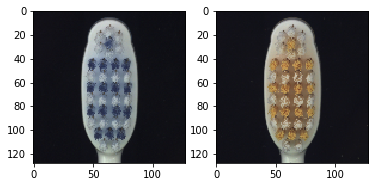

3629


In [49]:
imgA = train_dset[0][0]
imgB = train_dset[40][0]
show_imgs(imgA,imgB)
print(len(other_dset))

In [ ]:
### print a buch of samples
def printimgs(start=0,stop=3600,step=100,showRimg=False)
for i in range(start,stop,step):
    ind = i
    print(ind)
    if showRimg:
        show_imgs(other_dset[ind][0],
                 vec2img(img2vec(other_dset[ind][0]))
                 )
    else:
        show_imgs(other_dset[ind][0] )

In [50]:
# screw rotation 90 degrees
imgA = other_dset[2578][0]
imgB = other_dset[2516][0]

In [51]:
# capsule to pill
imgA = other_dset[500][0]
imgB = other_dset[2100][0]

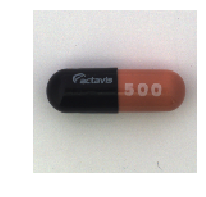

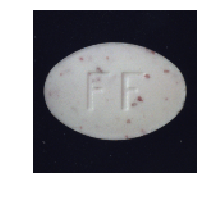

In [52]:
show_img_from_tensor(imgA)
show_img_from_tensor(imgB)

In [12]:
def img2vec(img):
    imgpu = img.unsqueeze(0).to("cuda")
    with torch.no_grad():
        z = givenModel.module.encoder(imgpu)
    return z[..., :100] # we only like mu
def vec2img(vec):
    with torch.no_grad():
        img = givenModel.module.decoder(vec.unsqueeze(-1).unsqueeze(-1))
        img = img.squeeze(0)
    return img

In [13]:

extralong = False

for i in range(36):
    ind = 100*i
    print(ind)
    
    previmg = other_dset[ind][0]
   
    imglist = [previmg]
    longimglist = [previmg]
    list1000 = [previmg]
    
  #  for j in range(10):
  #      imglist += [vec2img(img2vec(imglist[-1]))]
    for j in range(1000 if extralong else 100): # ten times the divergence!
        newimg = vec2img(img2vec(previmg))
        
        if j < 10:
            imglist += [newimg]
            
        if j%10==0 and j<100:
            longimglist += [newimg]
        
        if j%100==0 and extralong:
            list1000 += [newimg]
    
    show_imgs(*imglist)
    show_imgs(*longimglist)
    if extralong:
        show_imgs(*list1000)

0


NameError: name 'other_dset' is not defined

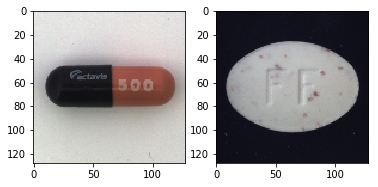

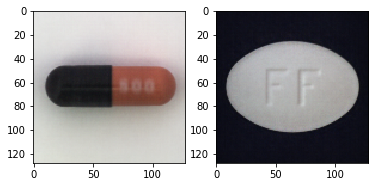

In [55]:
vecA = img2vec(imgA)
vecB = img2vec(imgB)
rimgA = vec2img(vecA)
rimgB = vec2img(vecB)
show_imgs(imgA,imgB)
show_imgs(rimgA,rimgB)

In [56]:
imgpuA = imgA.unsqueeze(0).to("cuda")
imgpuB = imgB.unsqueeze(0).to("cuda")
with torch.no_grad():
    zA = givenModel.module.encoder(imgpuA)
    zB = givenModel.module.encoder(imgpuB)


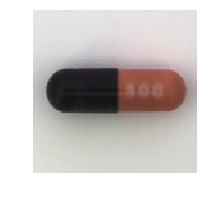

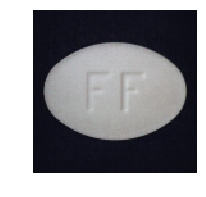

In [57]:
muA = zA[..., :100]
muB = zB[..., :100]
with torch.no_grad():
        rimgA = givenModel.module.decoder(muA.unsqueeze(-1).unsqueeze(-1))
        rimgB = givenModel.module.decoder(muB.unsqueeze(-1).unsqueeze(-1))
show_img_from_tensor(rimgA.squeeze(0))
show_img_from_tensor(rimgB.squeeze(0))

In [58]:
zs = []
for i in range(startStep,endStep):
    zs+=[zB + i*(zA-zB)/steps]

In [59]:
imgs = []
#    def reparameterize(self, mu, logvar):
#        std = (0.5 * logvar).exp()
#        eps = torch.randn_like(std)
#        return mu + eps * std
for j in range(startStep,endStep):
    i = j-startStep
    mu, logvar = zs[i][..., :100], zs[i][..., 100:]
    
    ############# make standard deviation zero, that is, use only mu in reparameterize
    logvar = torch.zeros_like(logvar)
    
    ### old way zrep = givenModel.module.reparameterize(mu, logvar).unsqueeze(-1).unsqueeze(-1)
    
    zrep = mu.unsqueeze(-1).unsqueeze(-1) # new way
    
    with torch.no_grad():
        imgs+= [givenModel.module.decoder(zrep)]

In [60]:
j=20
print(f"{modelName} B:{j/steps:.3f}")

f050 epo:480 B:1.000


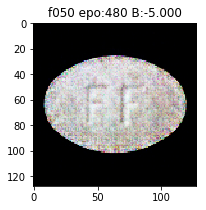

In [64]:

plt.rcParams["figure.figsize"] = (3,3)

frames = []
with torch.no_grad():
    for img in imgs:
        single_img = img.squeeze(0)
        single_img = single_img.permute(1,2,0).cpu().numpy()
        frames += [single_img]

def update(j):
    i = j-startStep
    #print(""+str(j/numInterpol)+"Blue "+str(1 - j/numInterpol)+"Orange:")
    plt.title(f"{modelName} B:{j/steps:.3f}")
    plt.imshow(frames[i])
    
#def update(i):
#    label = 'timestep {0}'.format(i)
#    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
#    line.set_ydata(x - 5 + i)
#    ax.set_xlabel(label)
#    return line, ax

#if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
from matplotlib.animation import FuncAnimation
import numpy as np
fig, ax = plt.subplots()
anim = FuncAnimation(fig, update, frames=np.arange(startStep, endStep), interval=50)
    #if len(sys.argv) > 1 and sys.argv[1] == 'save':
    #    anim.save('line.gif', dpi=80, writer='imagemagick')
    #else:
        # plt.show() will just loop the animation forever.
    #    plt.show()
#plt.show()

from IPython.display import HTML
HTML(anim.to_html5_video())



# Wait here, an video will show up above!

In [ ]:
sample_train_img, sample_train_target = train_dset[31]

In [ ]:
show_img_from_tensor(sample_train_img)

In [ ]:
for model in models:
    evaluate_and_show(model, sample_train_img.unsqueeze(0))